# Project 5
**Author:** Tommy Phung <br>
**Target:** Video Game Developers

## Overview 
With the **increasing demand** for video games, the market is primed and ready for **investment and development**. However, there isn't a hard and fast rule to make a great game much less a profitable one. There are many aspects to making video games and one of the most controllable features was the **genre of the game**. By narrowing down which genres are profitable, **developers can focus on making the correct games when concerning profit**. To get a better idea of what people like I used the community website, [**Backloggd**](www.backloggd.com/). 

It turns out that some of the **most common genres** happen to be **profitable** as well. This doesn't necessarily help since **Adventure and RPG** are common genres to have in games. **Indie** genres or Indie games are one of the **best genres** to have when making a game. Setting aside the Indie genre, I can isolate **which genres are good** when modeling. Indie developers can stick to **popular features**, Adventure and RPG, and consider arcade and strategy into their games as well. **Keeping Adventure and RPG** will keep the games **relatively safe** to make while enhancing them with a **mixture** of the suggested genres. 

When moving the threshold of success for more developed companies was a bit more complicated. <br>
The first model shows similar results to the Indie Model with **Simulator and Puzzle** as important genres to focus on. However, when rebalancing the dataset, **brawler** came up as an important feature. If a company wants to explore brawlers, this could be a **fruitful endeavor due to the low quality of brawler-based games**. Rebalancing doesn't seem to change the results but other features should be looked at such as developer since the rebalanced model performed poorly. 

The produced models perform best when considering a lower threshold and **should only be used** for **Indie Developers**. More data is needed to help determine better genres for higher sales or more analysis is needed to help the model.

## Business Understanding 
Video games have been a form of entertainment for all ages around the world. There has been **an increase in game production** with all the access to tools online as well as the demand for these games especially for the last couple of years of quarantine. <br>
Every year, **Steam**, one of the largest online video game platforms, has **300 games** on average published a day and this has only been increasing in the past decade.  
With so many games getting published, there is **a risk that the game won't be made profitable**. <br>

Depending on the **company size**, the number of sales changes can be a sign of a profitable game. <br>
For example, **Triple-A games** are expected to have a sale of **10 million units** whereas **Indie games**, which are smaller game companies, would expect **100,000 units** to be successful. 
There is also a bigger budget range when comparing Triple-A companies and Indie companies. 
To make a game that many would be interested in buying, **certain genres are more desirable than others** for the average player. <br>
By modeling the genres of the games, we can **isolate the genres to the best** to have when making a game that would **reach the benchmark** mentioned above. 

This information would be useful to have for **Indie developers** that would sell their games on Steam but can apply to other platforms. If a **new developer** is attempting to create a game, they should use the information to determine the best type of game that the audience would want to buy. **Triple-A** companies using the model should look at the worst genres and avoid those since they are already established and could improve their current library of games instead. 

## Data Understanding 
The first dataset came from [Backloggd](https://www.backloggd.com/) and [Kaggle](https://www.kaggle.com/). <br>
Backloggd is a **community-based** listing website that takes lists of games and combined them with various features such as **ratings, played and wishlist**. The main feature we looked at is **genres** with some insight gained from the Ratings feature.

The second dataset contians the **sales of games** from various regions. I looked at **Global Sales** which is just the sum of all the columns in the dataset. 

Since I am using both dataset, they **need to match** with one another to anaysis them fairly. This was the brekadown on the number of games and the final resulting dataframe. 

|  | Backloggd | Ranked | **Final** |
|---|:---:|:---:|:---:|
| **# of Games** | 60,000 | 16,598 | **4,466** |
| **Desired Feature** | Genres | Global Sales | **N/A** |
| **# of Columns** | 12 | 10 | **6** |

## Data Preperations
To begin, multiple libraries were imported into the notebook for training, testing and visualization. I created some function to reduce the clutter made from all the visiualizations. <br>
Majority of the libraries came from Sklearn to complete most of the modeling and testing. 

The datasets didn't have missing values with the features I was concerned with. There were some data formatting that needed to be done before any anylsis was possible.<br>
A metric was also needed to determine a game success. Overall, a game was considered profitable if they sold over 1 million units or 100,000 if they were an indie or independant developer. When refering to the threshold of profit, I will use old or older for 1 million and 100,000 for newer indie developers. 
These were the step taken to obtain the final dataframe to begin modeling.
1. All of the datasets are imported 
2. The game titles that **matched all the datasets** were the only one used. 
3. The columns were **Rating, Genres, Global_Sale and Title**. 
4. The column, **Genres**, were changed to actual list of the game's genres. 
5. Any duplicate titles were **combined** if applicable. 
6. Based off the Global_Sales, **two new columns** were added to the dataframe to indicate profit. 

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Modeling Libraries used 
from sklearn.tree import DecisionTreeClassifier    # Baseline classifier
from sklearn.ensemble import RandomForestClassifier   # Ensemble classifier
from sklearn.model_selection import train_test_split   # Training and testing set
from sklearn.model_selection import GridSearchCV   # Large search for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay   # Confusion matrix plots
from sklearn.metrics import f1_score, accuracy_score   # Metrics

### Import Custom Functions
Custom functions were created for clearer graph and clean up clutter in notebook.

In [2]:
# Uncomment code to download functions created from the project if using Google Colab
# ! mkdir functions 
# ! wget https://raw.githubusercontent.com/Tommyphung1/Project_5/master/functions/data_visuals.py -P functions
# ! wget https://raw.githubusercontent.com/Tommyphung1/Project_5/master/functions/data_cleaning.py -P functions

### Custom Functions

In [3]:
### Custom made functions for cleaning data
from functions import data_cleaning as dc 
from functions import data_visuals as dv

### Original Datasets

In [4]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)    ### Main dataset with the genres.
ranked_df = pd.read_csv('datasets/vgsales.csv')                   ### Dataset to grab global sales from. 
comb_df = df[df.Title.isin(ranked_df.Name.unique())]              ### Only take the titles that matches
comb_df.reset_index(drop= True, inplace = True)                   ### Resest the index for nice visuals

#### Extract Useful Columns

In [5]:
comb_df = comb_df[['Title', 'Genres', 'Rating']]           ### Only Take the useable features
comb_df.drop_duplicates(subset= 'Title', inplace= True)    ### Drop any duplicates
comb_df.Genres = df.Genres.apply(dc.convert_to_list)       ### Convert to list like

#### Combine Second Dataset Column

In [6]:
matched_df = ranked_df[ranked_df.Name.isin(comb_df.Title.unique())][['Name', 'Global_Sales', 'Platform']]    ### Only Game title that are in both datasets.
final_df = comb_df.sort_values('Title')                                                                      ### Sort the Titles
final_df['Global_Sales'] = matched_df.groupby('Name').sum().sort_values('Name').Global_Sales.values          ### Group the titles and sum the similar name entry in the dataset.
final_df.reset_index(drop= True, inplace= True)                                                              ### Reset the index 

#### Add Two Custom Columns

In [7]:
### Add a new column with all 0. 
final_df['Over_1'] = 0
final_df['Over_.1'] = 0
final_df.loc[final_df['Title'].isin(ranked_df[ranked_df.Global_Sales >= 1].Name.values), 'Over_1'] = 1      ### Set 1 if over 1
final_df.loc[final_df['Title'].isin(ranked_df[ranked_df.Global_Sales >= .1].Name.values), 'Over_.1'] = 1    ### Set 1 if over .1

## Data Distribution
There are **24 genres** with the most common being **Adventure, Indie, RPG, Shooter, and Puzzle**. <br>
When looking at the Ratings for the games, there is a **normal distribution** which indicates that there is an even number of bad and good games in the list. 


### Class Distributions
The benchmark for Older companies are as followed. <br>
**74.2%** was marked as not profitable <br>
**25.8%** was marked as profitable

When considering Newer games and their benchmark for profit, <br>
**20.9%** was marked as not profitable <br>
**79.1%** was marked as profitable

#### Class Inbalance Graph

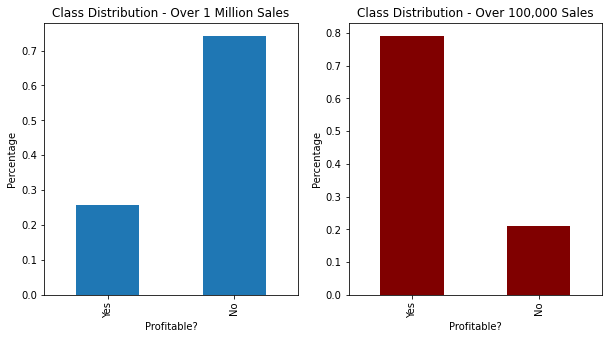

In [8]:
### Graphing the distribution of the classes
### Two of the graphs are from there respective threshholds

fig, ax = plt.subplots(ncols= 2, figsize = (10,5))

final_df['Over_1'].value_counts(normalize= True,ascending= True).plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Class Distribution - Over 1 Million Sales');
ax[0].set_xlabel('Profitable?')
ax[0].set_xticklabels(['Yes', 'No'])
ax[0].set_ylabel('Percentage');

final_df['Over_.1'].value_counts(normalize= True).plot(kind = 'bar', ax = ax[1], color = 'maroon')
ax[1].set_title('Class Distribution - Over 100,000 Sales');
ax[1].set_xlabel('Profitable?')
ax[1].set_xticklabels(['Yes', 'No']);
ax[1].set_ylabel('Percentage');

Only **25.8%** of the games were able to make a sale of over 1 million. <br>
While the **74.2%** was unable to reach that benchmark. <br>
The benchmark differs from the size of the company. 

When considering most indie games consider sales over **100,000** sales to be successful, more games reached that benchmark. <br>
**79.1%** of games were considered profitable while only **20.9%** weren't able to. 

### Rating Distribution Graph

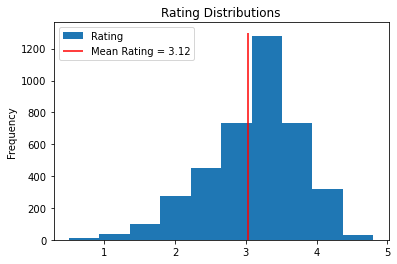

In [9]:
### Rating Distrbution 
final_df[final_df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);
plt.vlines(df.Rating.mean(), 0, 1300, colors= 'red', label= 'Mean Rating = {}'.format(round(final_df.Rating.mean(), 2)));
plt.legend();

Normal distrbution of games would mean that all types of games were included leaving for a balanced dataset. <br>
If all or most of the **games perform well**, that would **indirectly lead** to **better sales** in most cases. 
Instead, since this website was built by the fanbase, there should be a balance of popular games and more obsure games.

### Genres Distribution Graph

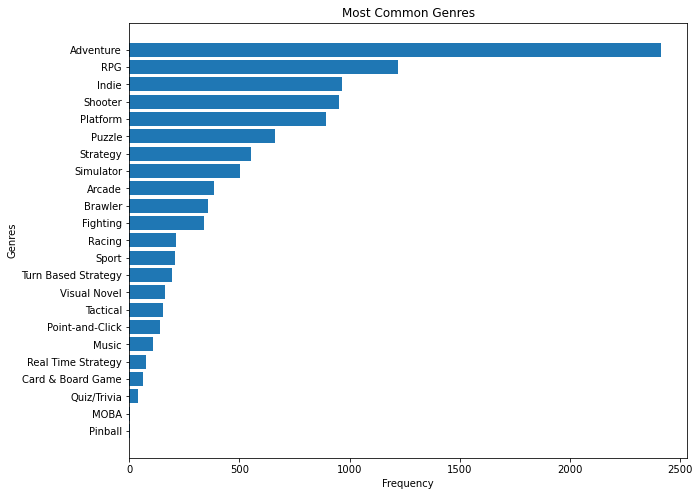

In [10]:
sort_genres = dc.count_values(final_df.Genres.values)    ### Value count the genres from the dataset

### Plot the genres distribution
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(list(sort_genres.keys()), list(sort_genres.values()));
ax.set_title('Most Common Genres');
ax.set_ylabel('Genres');
ax.set_xlabel('Frequency');

Unsurprisingly, **adventure** was the most common genre in the dataset having roughly **2,500** with this tag, followed by **RGP, Indie, Shooter, and Platform**. <br>
Due to the number of games with these genres, we can expect that most of the profitable games would have **similar genres**.

## Baseline Models
The baseline model will be a Decision Tree with default parameters to have something to compare the different models and which performs the best. 
Two baseline models are made for the two conditions, the 100,000 unit threshold and the 1 million unit threshold. A random state of 10 was used on all the models to keep consistency. 

In [11]:
### Create dataframe that have the features of the games, title, and target features
genre_df = pd.concat([final_df.Title, pd.get_dummies(final_df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), final_df[['Over_1', 'Over_.1']]], axis= 1)

In [12]:
X = genre_df[genre_df.columns[1:-2]]    ### Include only the feature columns
y =  genre_df.Over_1   ### Target column over 1 selected

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10)    ### Create the training and testing set with the values
y_train_2 = genre_df.loc[X_train.index]['Over_.1']   ### Using the same index, declare a new y_train
y_test_2 = genre_df.loc[X_test.index]['Over_.1']     ### Using the same index, declare a new y_test

In [13]:
### Over 1 Million
baseline = DecisionTreeClassifier(random_state=10)   ### Declare the classifier 
baseline.fit(X_train, y_train)   ### Train the classifier

### Over 100,000
baseline_2 = DecisionTreeClassifier(random_state=10)   ### Declare the classifier 
baseline_2.fit(X_train, y_train_2)    ### Train the classifier

DecisionTreeClassifier(random_state=10)

### Baseline Results 

In [57]:
print('Older Model')
print('--------------')
print('F1-Score: {}'.format(round(f1_score(y_test,baseline.predict(X_test)),2)))
print('Accuracy: {}%'.format(round(accuracy_score(y_test,baseline.predict(X_test))* 100,2)))
print('--------------')

print('Newer Model')
print('--------------')
print('F1-Score: {}'.format(round(f1_score(y_test_2,baseline_2.predict(X_test)),2)))
print('Accuracy: {}%'.format(round(accuracy_score(y_test_2,baseline_2.predict(X_test))* 100,2)))
print('--------------')

Older Model
--------------
F1-Score: 0.16
Accuracy: 72.52%
--------------
Newer Model
--------------
F1-Score: 0.87
Accuracy: 77.08%
--------------


#### Baseline Model Anaysis
From the baseline models, there was a **72.52%** accuracy when determine whether a game would sell over 1 million units. <br>
There was a slight increase in the accuracy when determinng if a game would sell over 100,000 with **77.08%** accuracy.
It would be reasonable to assume that the model is more accurate when looking for games that sold more than 100,000 units since more games.
When looking at the **F1-Score**, we can see that the model was able to predict the succuess of games with over 100,000 sales much **better** than the model predicting if the game sold more than 1 million units. From **16.35% to 86.76%**, using genres to predict games making more than 100,000 game sales is **much more accurate** when determining profitable games than the Older model. 

### Feature Importance Graphs
The model provides feature importances for each feature giving a percentage to determine which was the **most important** when deciding whether the game was profitable.
However, it is important to see the distribution of the genres alone to see if the data would favor one genre or another. Assuming that more games with a given genre would be picked out more often than a rare genre. 

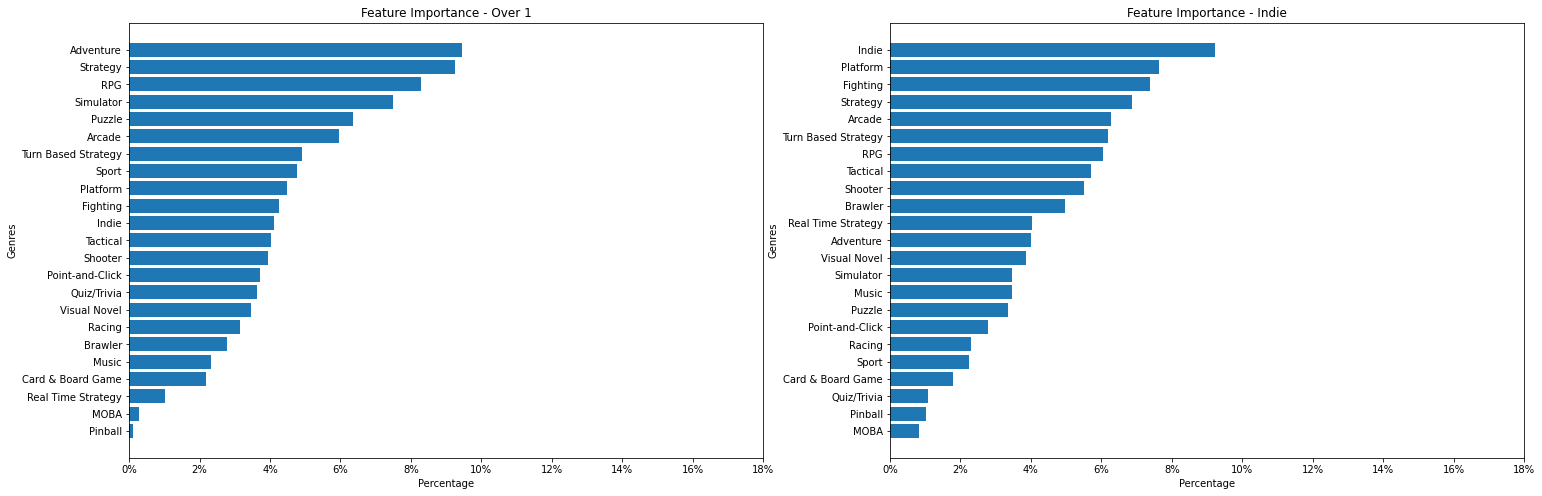

In [15]:
feature_list = dc.convert_feature(baseline)   ### Take the feature importance and make them to lists
feature_list_2 = dc.convert_feature(baseline_2)    ### Take the feature importance and make them to lists

dv.visual_baseline(feature_list, feature_list_2)   ### Visualize the feature importance from two lists

#### Top Five Features Importance
Interestingly, the difference between making a games that would make 1,000,000 units is **completely different** than that of 100,000. The only similar genre that the top 5 genres was **strategy** with **adventure and indie games** being the most importance for 1 million and 100,000 respectively. 

Looking back with most common genres, **most of those genres** appear to be in **one of the two feature importance list** with shooter being in neither. 
This directly support the fact that even though many gaves have the title, **they are not directly correctate to a good selling games**. In other words, **some genres would work better** for **indie** games than others. 

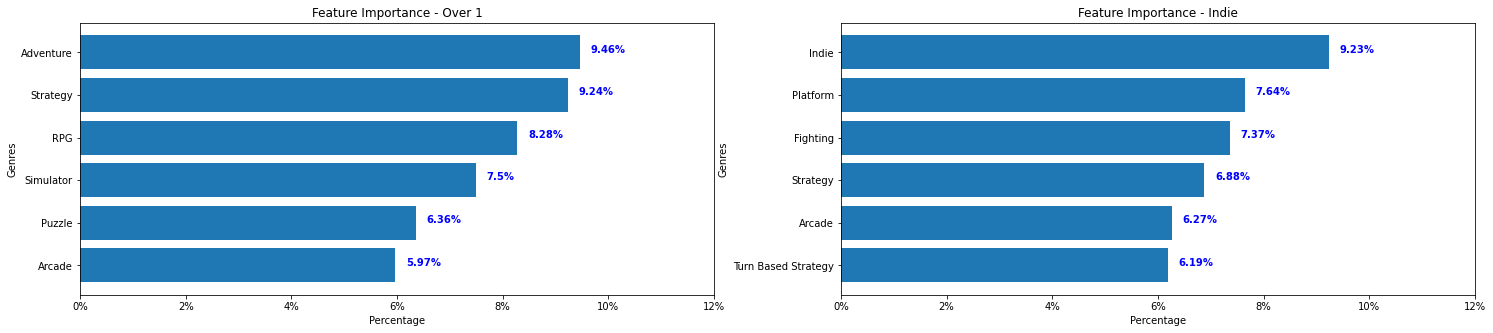

In [16]:
dv.visual_top_5(feature_list, feature_list_2)    ### Visual the top 5 genres 

## Random Forest Model - Default Parameter

In [17]:
random = RandomForestClassifier(random_state=10)  
random.fit(X_train, y_train) 

random_2 = RandomForestClassifier(random_state=10)  
random_2.fit(X_train, y_train_2) 

RandomForestClassifier(random_state=10)

### Feature Importance Graphs

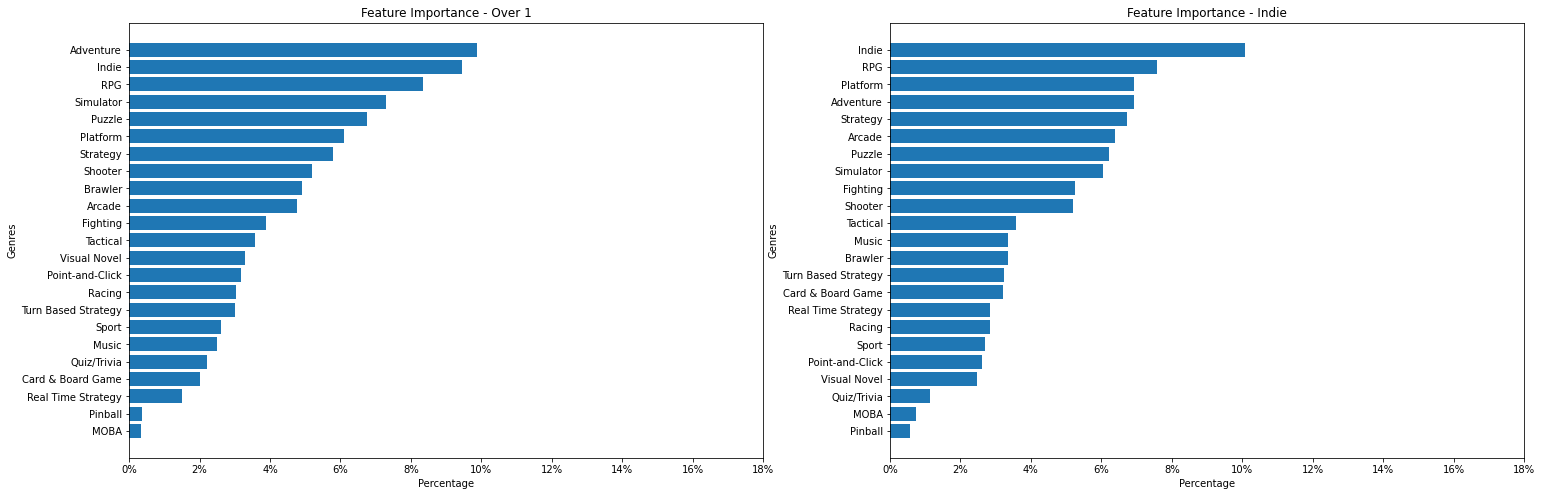

In [18]:
random_list = dc.convert_feature(random)
random_list_2 = dc.convert_feature(random_2)

dv.visual_baseline(random_list, random_list_2)

#### Top Five Feature Importance
The most important observation was that **Indie** genre were marked as being importance for **both cases**. <br>
**Adventure and RPG** moved backed up for the Indie model and strategy was moved out from the top five for Older companies. <br>
New companies have **Fighting** moved out from  in place with **RPG**. 

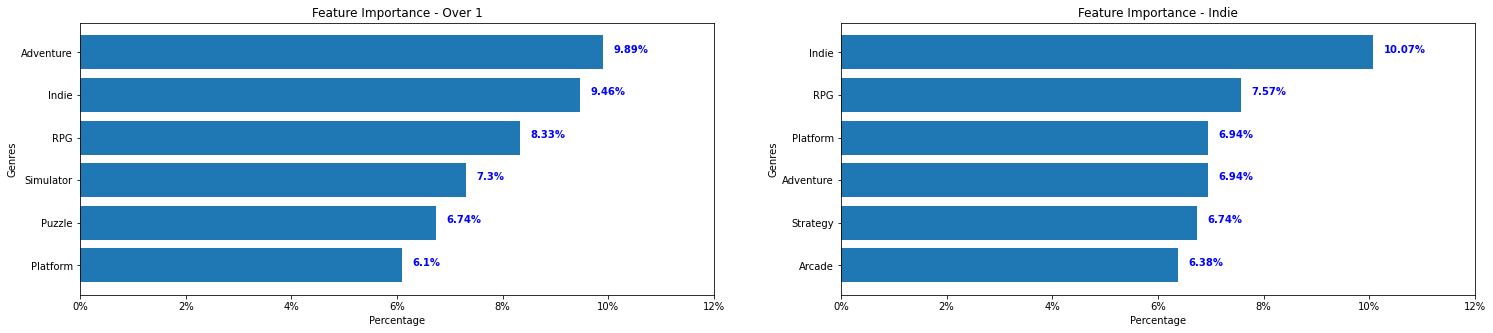

In [19]:
dv.visual_top_5(random_list, random_list_2)

## Random Forest Models - GridSearch

In [20]:
# Original Parameter Grid 
param_grid = {
                'n_estimators' : [10, 20, 50, 75, 100],
                'criterion': ['entropy', 'gini'],
                'max_depth' : [None, 10, 15, 20, 25, 30],
                'min_samples_split' : [.1, .3,.5, .7, .9, 2, 4, 6, 10],
                'min_samples_leaf' : [.1, .3,.5, .7, .9, 2, 4, 6, 10],
                'max_features' : [None, 'sqrt', 10, 15, 20],
                'random_state': [10]
             }


In [21]:
### Over 1 Million 
forest_clf_base = RandomForestClassifier(criterion = 'entropy',max_depth = 20, max_features = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 75, random_state = 10)
forest_clf_base.fit(X_train, y_train)

### Over 100,000 
forest_clf_base_2 = RandomForestClassifier(criterion = 'entropy',max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 10)
forest_clf_base_2.fit(X_train, y_train_2)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       random_state=10)

### Random Forest Results

In [56]:
print('Older Model')
print('--------------')
print('F1-Score: {}'.format(round(f1_score(y_test, forest_clf_base.predict(X_test)),2)))
print('Accuracy: {}%'.format(round(accuracy_score(y_test,forest_clf_base.predict(X_test)),4) * 100))
print('--------------')

print('Newer Model')
print('--------------')
print('F1-Score: {}'.format(round(f1_score(y_test_2, forest_clf_base_2.predict(X_test)),2)))
print('Accuracy: {}%'.format(round(accuracy_score(y_test_2,forest_clf_base_2.predict(X_test)),4) * 100))
print('--------------')

Older Model
--------------
F1-Score: 0.15
Accuracy: 73.41%
--------------
Newer Model
--------------
F1-Score: 0.88
Accuracy: 78.51%
--------------


In [54]:
print('Decision Tree - Baseline')
print('___________________')
print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, baseline.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, baseline.predict(X_test)), 4)* 100))    ### Over 1 Default Random Over 100,000
print('-------------------')
print('Over 100,000')
print('F1-Score: {}'.format(round(f1_score(y_test_2, baseline_2.predict(X_test)), 2)))        ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test_2, baseline_2.predict(X_test)), 4)* 100))    ### Over 1 Default Random Over 100,000

print('___________________')
print('Random Forest')
print('___________________')

print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, random.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, random.predict(X_test)), 4)* 100))
print('-------------------')
print('Over 100,000')
print('F1-Score: {}'.format(round(f1_score(y_test_2, random_2.predict(X_test)), 2)))        ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test_2, random_2.predict(X_test)) * 100, 2)))

print('___________________')
print('Random Forest GridSearch')
print('___________________')

print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, forest_clf_base.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, forest_clf_base.predict(X_test)) * 100, 2)))
print('-------------------')
print('Over 100,000')
print('F1-Score: {}'.format(round(f1_score(y_test_2, forest_clf_base_2.predict(X_test)), 2)))        ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test_2, forest_clf_base_2.predict(X_test)) * 100, 2)))
print('___________________')

Decision Tree - Baseline
___________________
Over 1 Million
F1-Score: 0.16
Accuracy: 72.52%
-------------------
Over 100,000
F1-Score: 0.87
Accuracy: 77.08%
___________________
Random Forest
___________________
Over 1 Million
F1-Score: 0.2
Accuracy: 73.14%
-------------------
Over 100,000
F1-Score: 0.87
Accuracy: 77.89%
___________________
Random Forest GridSearch
___________________
Over 1 Million
F1-Score: 0.15
Accuracy: 73.41%
-------------------
Over 100,000
F1-Score: 0.88
Accuracy: 78.51%
___________________


### Older Threshold Results
| Model | F1-Score | Accuracy |
|---|:---:|---|
| Decision Tree | .1635 | 72.52% |
| Random Forest | **.1979** | 73.14% |
| Random Forest GS | .1500 | **73.41%** |


### Newer Threshold Results
| Model | F1-Score | Accuracy |
|---|:---:|---|
| Decision Tree | .8676 | 77.08% |
| Random Forest | .8739 | 77.89% |
| Random Forest GS | **.8800** | **78.51%** |

## Confusion Matrixes
Confusion matrix shows the results for the model and what the true values are and what was predicted. There are no cases for this matrix
If both the model and the values are indicated as not profitable, that is knowned as a true negative.
If both the model and the values are indicated as profitable, that is knowned as a true postive.
If the model predicts a positvie, and the values was actually a negative, that is knowned as a false positve. 
If the model predicts a negative, and the values was actually a positve, that is knowned as a false negative. 

Based off the models results when deciding a successful game, the model have a tendecy to predict that all the games are not profitable, leading to a lot of false negatives. 
The default parameter for random forest perform the best with the most true prediction for both profitable and non profitable games. The class inbalance is making a big differnece in the score and should be looked at. 

When looking at the Indie version of the models, they perform much better than the others. The models were able to predict the profitable well with only the fewer false positives. However, this may be due to the fact that there are more profitable games then not with this metric. It appears that the model declare most as profitable but does increase from models as more is categorizese correctly. 

### Older Models

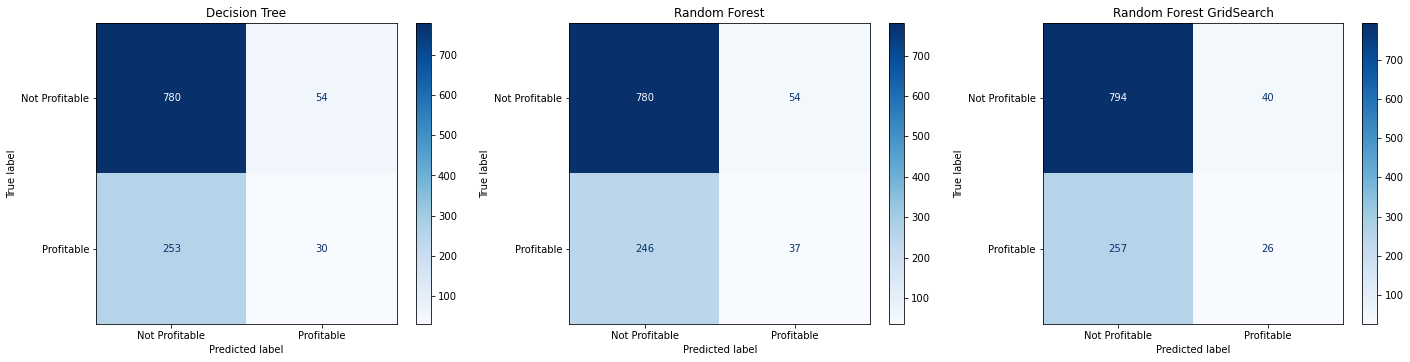

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
classifiers = [baseline, random, forest_clf_base]
graph_titles = ['Decision Tree', 'Random Forest', 'Random Forest GridSearch']
index = 0
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels= ['Not Profitable', 'Profitable'])
    ax.title.set_text(graph_titles[index])
    index += 1
plt.tight_layout()  
plt.show()

### Newer Models

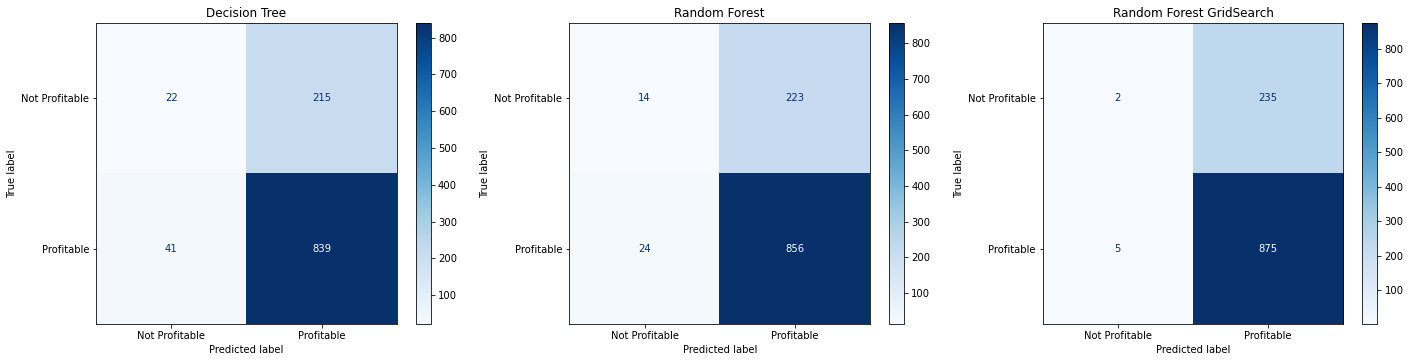

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
classifiers = [baseline_2, random_2, forest_clf_base_2]
graph_titles = ['Decision Tree', 'Random Forest', 'Random Forest GridSearch']
index = 0
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls, 
                          X_test, 
                          y_test_2, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels= ['Not Profitable', 'Profitable'])
    ax.title.set_text(graph_titles[index])
    index += 1
plt.tight_layout()  
plt.show()

## Class Inbalance Solution
Since the dataset has a major class inbalance, we need to model again with a more even dataset. The dataset is quite limited so I oversample by sythntically adding more data to the training set. 
SMOTE was used to oversample the dataset and pandas built in resampling method to resample 50% of the new balanced dataset. 

In [26]:
### SMOTE function call and setup
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)    # Resample the training set from the first modeling 
X_train_resampled_2, y_train_resampled_2 = smote.fit_resample(X_train, y_train_2)    # Resample the training set from the second modeling 

In [27]:
### Resample the new sampled training sets
X_train_bal = X_train_resampled.sample(frac= .5, replace = True, random_state= 10)
y_train_bal = y_train_resampled.sample(frac= .5, replace = True, random_state= 10)
# Second Indie training set 
X_train_2_bal = X_train_resampled_2.sample(frac= .5, replace = True, random_state= 10)
y_train_2_bal = y_train_resampled_2.sample(frac= .5, replace = True, random_state= 10)

### Fiting for Over 1 Million

In [28]:
baseline_bal = DecisionTreeClassifier(random_state=10)  
baseline_bal.fit(X_train_bal, y_train_bal) 

random_bal = RandomForestClassifier(random_state=10) 
random_bal.fit(X_train_bal, y_train_bal) 

forest_clf_base_bal = RandomForestClassifier(criterion = 'entropy',max_depth = None, max_features = None, min_samples_leaf = .1, min_samples_split = .7, n_estimators = 10, random_state = 10)
forest_clf_base_bal.fit(X_train_bal, y_train_bal)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=0.1, min_samples_split=0.7,
                       n_estimators=10, random_state=10)

### Fitting for Over 100,000

In [29]:
baseline_bal_2 = DecisionTreeClassifier(random_state=10)  
baseline_bal_2.fit(X_train_2_bal, y_train_2_bal) 

random_bal_2 = RandomForestClassifier(random_state=10) 
random_bal_2.fit(X_train_2_bal, y_train_2_bal) 

forest_clf_base_bal_2 = RandomForestClassifier(criterion = 'entropy',max_depth = 10, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 6, n_estimators = 20, random_state = 10)
forest_clf_base_bal_2.fit(X_train_2_bal, y_train_2_bal)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=20, random_state=10)

### Top Genres - Balanced Graphs
The results for the balanced modeled are relatively the same with a couple genres suffled from each other. The two genres to note was Brawlers and Shooters which were lower in the list of importance. 
Its important to note that majority of the second model are close together and could be interpreted as similar in importances. 

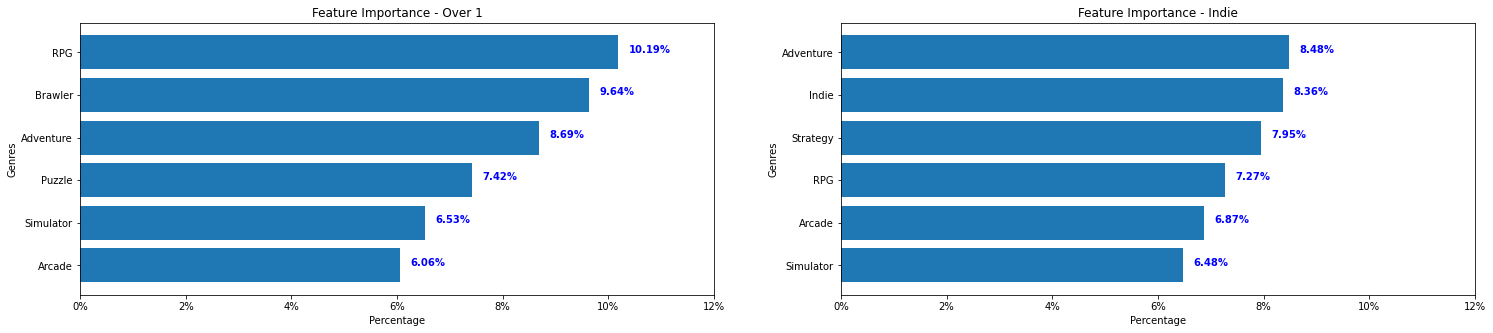

In [30]:
baseline_bal_list = dc.convert_feature(baseline_bal)
baseline_bal_list_2 = dc.convert_feature(baseline_bal_2)

dv.visual_top_5(baseline_bal_list, baseline_bal_list_2)

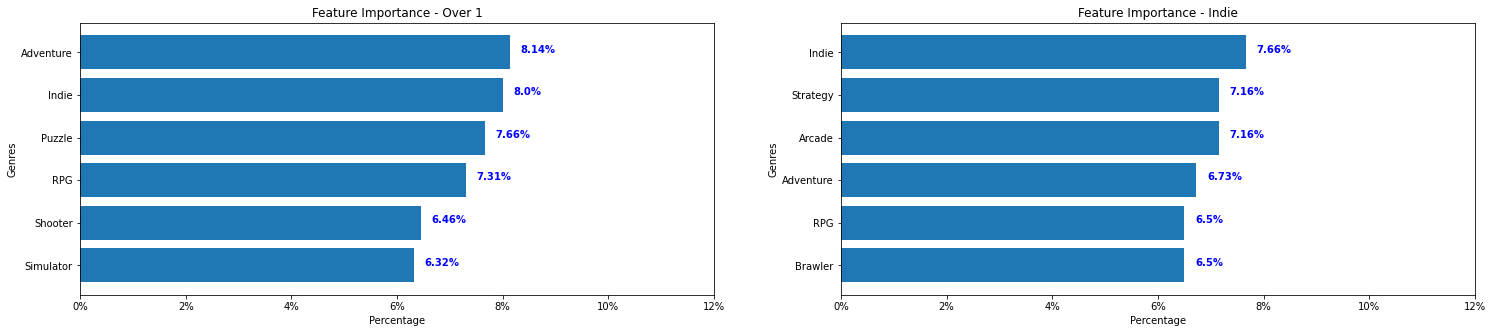

In [31]:
dv.visual_top_5(dc.convert_feature(random_bal), dc.convert_feature(random_bal_2))

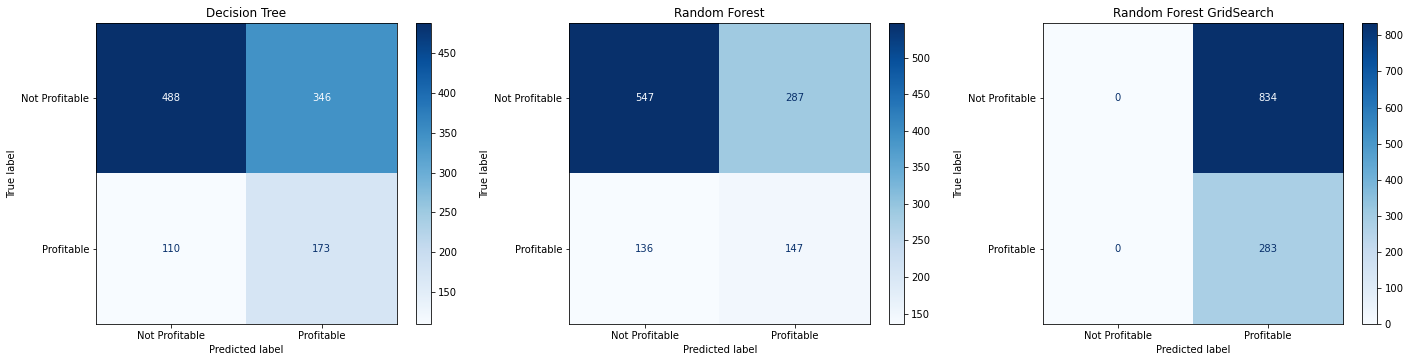

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
classifiers = [baseline_bal, random_bal, forest_clf_base_bal]
graph_titles = ['Decision Tree', 'Random Forest', 'Random Forest GridSearch']
index = 0
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels= ['Not Profitable', 'Profitable'])
    ax.title.set_text(graph_titles[index])
    index += 1
plt.tight_layout()  
plt.show()

In [44]:
print('Decision Tree - Baseline')
print('___________________')
print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, baseline_bal.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, baseline_bal.predict(X_test)), 4)* 100))    ### Over 1 Default Random Over 100,000

print('___________________')
print('Random Forest')
print('___________________')

print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, random_bal.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, random_bal.predict(X_test))* 100, 2)))
print('-------------------')

print('___________________')
print('Random Forest GridSearch')
print('___________________')

print('Over 1 Million')
print('F1-Score: {}'.format(round(f1_score(y_test, forest_clf_base_bal.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, forest_clf_base_bal.predict(X_test)) * 100, 2)))
print('-------------------')


Decision Tree - Baseline
___________________
Over 1 Million
F1-Score: 0.43
Accuracy: 59.18%
___________________
Random Forest
___________________
Over 1 Million
F1-Score: 0.41
Accuracy: 62.13%
-------------------
___________________
Random Forest GridSearch
___________________
Over 1 Million
F1-Score: 0.4
Accuracy: 25.34%
-------------------


In [38]:
print('Over 100,000')

print('Decision Tree - Baseline')
print('___________________')
print('F1-Score: {}'.format(round(f1_score(y_test, baseline_bal_2.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, baseline_bal_2.predict(X_test)), 4)* 100))    ### Over 1 Default Random Over 100,000

print('___________________')
print('Random Forest')
print('___________________')
print('F1-Score: {}'.format(round(f1_score(y_test, random_bal_2.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, random_bal_2.predict(X_test))* 100, 2)))
print('-------------------')

print('___________________')
print('Random Forest GridSearch')
print('___________________')
print('F1-Score: {}'.format(round(f1_score(y_test, forest_clf_base_bal_2.predict(X_test)), 2)))          ### Over 1 Default Random Over 1
print('Accuracy: {}%'.format(round(accuracy_score(y_test, forest_clf_base_bal_2.predict(X_test)) * 100, 2)))


Over 100,000
Decision Tree - Baseline
___________________
F1-Score: 0.37
Accuracy: 46.64%
___________________
Random Forest
___________________
F1-Score: 0.37
Accuracy: 44.58%
-------------------
___________________
Random Forest GridSearch
___________________
F1-Score: 0.4
Accuracy: 29.63%


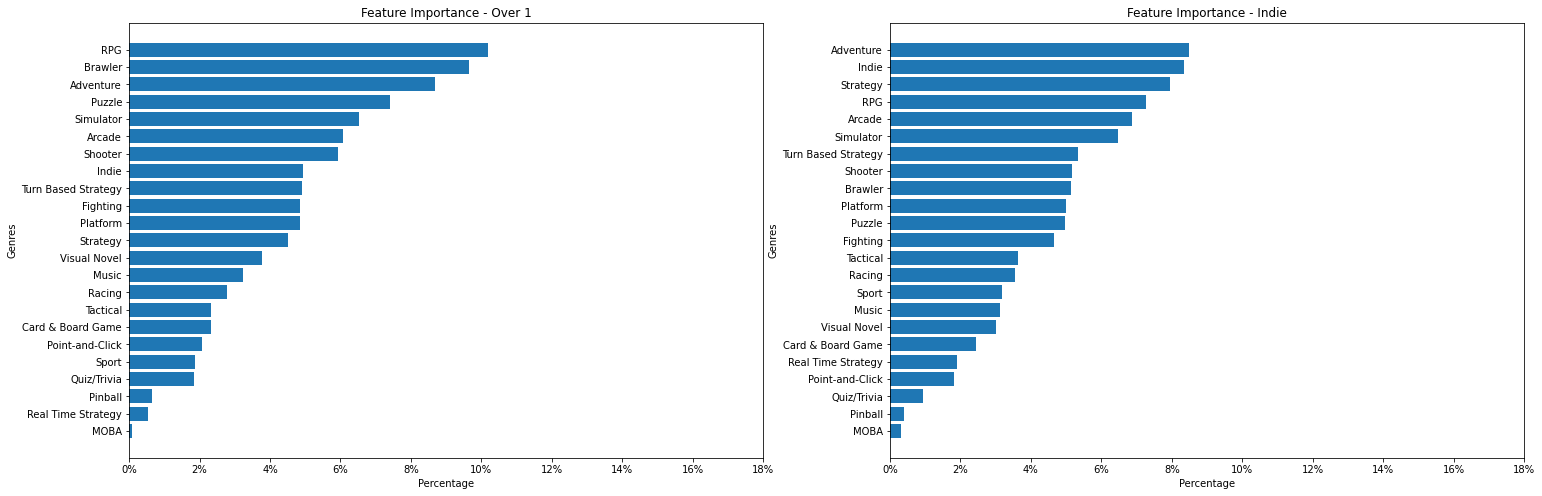

In [35]:
bal_list = dc.convert_feature(baseline_bal)
bal_list_2 = dc.convert_feature(baseline_bal_2)

dv.visual_baseline(bal_list, bal_list_2)

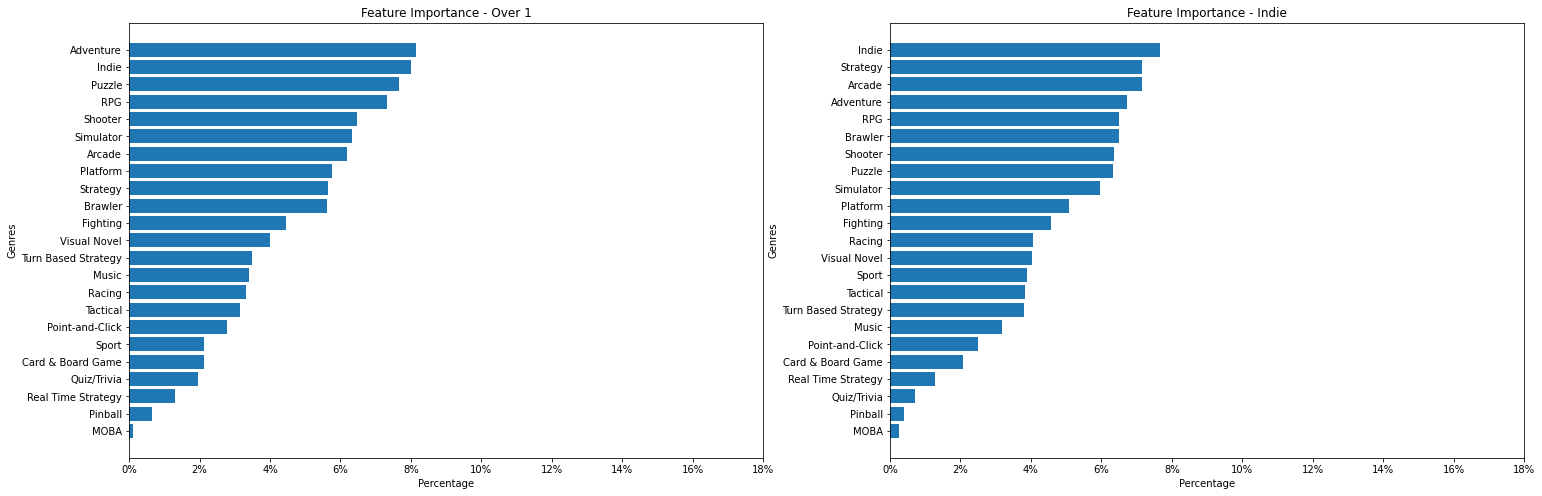

In [36]:
random_bal_list = dc.convert_feature(random_bal)
random_bal_list_2 = dc.convert_feature(random_bal_2)

dv.visual_baseline(random_bal_list, random_bal_list_2)

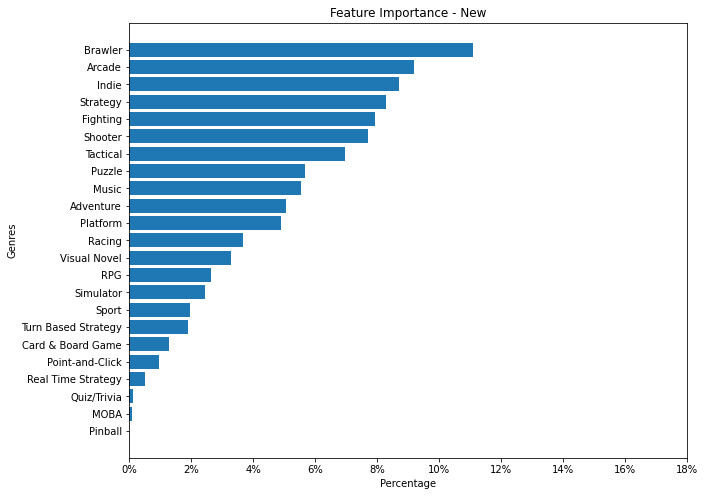

In [37]:
grid_bal_list_2 = dc.convert_feature(forest_clf_base_bal_2)

x = [x[0] for x in grid_bal_list_2]
y = [x[1] for x in grid_bal_list_2]

fig, ax = plt.subplots(figsize = (10,8))
ax.barh(x, y)
ax.set_title('Feature Importance - New')
xlabel = ['{}%'.format(x) for x in np.arange(0,20,2)]
ax.set_xticks(np.arange(0,20,2));
ax.set_xticklabels(xlabel);
ax.set_ylabel('Genres');
ax.set_xlabel('Percentage');

### Old Model Threshold
| Rank | Baseline | Random Forest |
|:---:|:---:|:---:|
| 1 | **RPG** | **Adventure** |
| 2 | Brawler | Indie |
| 3 | **Adventure** | Puzzle |
| 4 | Puzzle | **RPG** |
| 5 | Simulator | Shooter |

### New Model Threshold
| Rank | Baseline | Random Forest | Random Forest GS |
|:---:|:---:|:---:|:---:|
| 1 | Adventure | Indie | Brawler |
| 2 | Indie | **Stategy** | **Arcade** |
| 3 | **Strategy** | **Adcade** | Indie |
| 4 | **Arcade** | Adventure | **Strategy** |
| 5 | Simulator | RPG | Fighting |

## Analysis
## Developed Companies
When looking over video games that made over 1 million in sales, the best genres to have **adventure, RPG, simulator, and strategy games**. Since there is a **saturation** of **Adventure and RPG**, strategy and simulator games would be best to make games that people would buy. This may be due to that most games pair these genres together so it would best to avoid these genres unless known for the genre themselves. Keep in mind that fewer games may also mean that most audiences may not be looking for that specific genre at all which may limit others to play. The desirable result would be able to make a game that encompasses multiple genres like adding **strategy in their adventure games** or **shooter platformers**. 

## Indie Developers Recommendations
When looking at the idea of indie developers in mind, there is a slight change in mindset. Indie games have two choices in making a game, make a unique game and define the genre they planned with their game, or go to a niche area that has little to no competition to the genre instead. There seems to be a **great deal of interest in indie games** as a whole, being consistently the **most important genre** in making **over 100,000 in sales**. 
If the goal is to start making games, it would be safe to stick with the games in the top feature importance to increase the chances of a good game. Once a genre of games proves to be the best, the best advice would be to continue to make the games define themselves to that genre. Most people won't expect anything so striking with the **common genres would be safest**. 

When looking at feature importance when looking at the games labeled with Indie, there was a drastic shift in what the model determined as important. It appeared that **RPG and Arcade** performed the **best for both** the thresholds meaning that the most successful indie games were with these genres. Other good genres were a variety of **platformers, simulators, visual novels, adventure, and fighting**. Given how Indie games usually varies, sticking the RPGs and Arcade style games would be **best for new developers**.

## Balanced Analysis
After balancing and resampling the training set to get a more even distribution, there was a slight change. Although the majority of the genres stayed the same, two genres stood out even though they were uncommon based on other metrics. **Brawler and Fighting** seemed to perform well depending on the model and should be explored. **This may be too risky for indie developers** due to the smaller pool of games and the lower accuracy of the model but **could be beneficial for older developers** in creating these type of games. 

## Recommendations Summary

| Rank | Over 1,000,000 | Over 100,000 |
|:---:|:---:|:---:|
| 1 | Adventure | RPG |
| 2 | RPG | Platform |
| 3 | **Simulator** | Adventure |
| 4 | **Puzzle** | **Strategy** |
| 5 | Platform | **Arcade** |

**Triple-A Developer**: <br>
**Safe genres** to make are **Adventure and RPG** due to the reliablity in the gaming market. <br>
Add **puzzle and simulators** for added varity in games to increase performance.

**Indie Developers**: <br>
Avoid uncommon genres and stick to the common genres. **Adventure and RPG** are safe as well along with **platformer and shooters**. <br>
Adding **Strategy or Acade** in their game would increase the likelihood of performing well. 

## Next Step
1. **Add developer and publisher to the model**. There are **potential markers** that may prove to be a huge factor in making a profitable game.  <br>
2. **Add more existing games into the dataset when modeling**. There were a lot of games that weren't added to the final dataframe due to the title not matching perfectly and it would take too much time to individually look and see why that would be the case. More data would ideally lead to better modeling, especially for the modeling of games with over 1 million units in sales.  
3. **Determine trends in genres for each year.** Throughout history, there have been trends that I have noticed from game developers making similar styles of games. Some example from the top of my head was the MOBA, Open World, and Battle Royal trend in most recent years where they were extremely popular and widely made even poorly. 